In [13]:
import pandas as pd

# Carregar dados de treino e teste
train_data = pd.read_csv('/home/usuario/SpaceShipTitanic/data/train.csv')
test_data = pd.read_csv('/home/usuario/SpaceShipTitanic/data/test.csv')
sample_submission = pd.read_csv('/home/usuario/SpaceShipTitanic/data/sample_submission.csv')

# Exibir as primeiras linhas do conjunto de dados de treino
print(train_data.head())


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [12]:
import plotly.io as pio
pio.renderers.default = 'notebook'


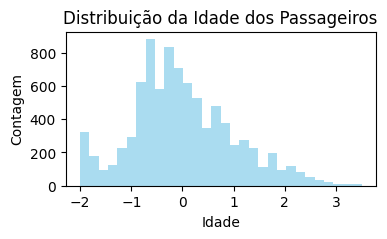

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 2))
plt.hist(train_data['Age'].dropna(), bins=30, alpha=0.7, color='skyblue')
plt.title('Distribuição da Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()


/tmp/ipykernel_5152/1321415186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HomePlanet', data=train_data, palette='viridis')


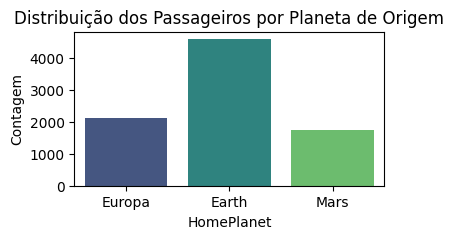

In [14]:
import seaborn as sns

plt.figure(figsize=(4, 2))
sns.countplot(x='HomePlanet', data=train_data, palette='viridis')
plt.title('Distribuição dos Passageiros por Planeta de Origem')
plt.xlabel('HomePlanet')
plt.ylabel('Contagem')
plt.show()


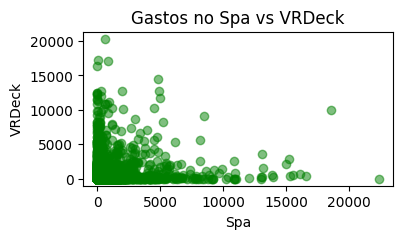

In [21]:
# Gráfico de dispersão para gastos em Spa e VRDeck
plt.figure(figsize=(4, 2))
plt.scatter(train_data['Spa'], train_data['VRDeck'], alpha=0.5, c='green')
plt.title('Gastos no Spa vs VRDeck')
plt.xlabel('Spa')
plt.ylabel('VRDeck')
plt.show()

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregar o conjunto de teste 'real'
test_data = pd.read_csv('/home/usuario/SpaceShipTitanic/data/test.csv')

# Tratar valores ausentes no conjunto de teste de acordo com o pré-processamento do conjunto de treino
test_data['Age'] = test_data['Age'].fillna(train_data['Age'].median())
test_data['RoomService'] = test_data['RoomService'].fillna(0)
test_data['FoodCourt'] = test_data['FoodCourt'].fillna(0)
test_data['ShoppingMall'] = test_data['ShoppingMall'].fillna(0)
test_data['Spa'] = test_data['Spa'].fillna(0)
test_data['VRDeck'] = test_data['VRDeck'].fillna(0)

# Codificação one-hot para variáveis categóricas no conjunto de teste
test_data = pd.get_dummies(test_data, columns=['HomePlanet', 'CryoSleep', 'Destination'], drop_first=True)

# Adicionar colunas ausentes no conjunto de teste e organizar a ordem das colunas
target_columns = ['PassengerId', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt', 
                  'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 
                  'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True', 
                  'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']

for col in target_columns:
    if col not in test_data.columns:
        test_data[col] = 0  # Ou use np.nan para colunas que não deveriam ser zero

# Ordenar as colunas no conjunto de teste conforme a ordem do conjunto de treino
test_data = test_data[target_columns]

# Padronizar dados numéricos no conjunto de teste com o mesmo scaler usado no treino
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
test_data[num_cols] = scaler.transform(test_data[num_cols])

# Exibir as primeiras linhas para confirmação
test_data.head()


,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,G/3/S,-0.124841,False,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,Nelly Carsoning,0,False,False,True,False,True
1,0018_01,F/4/S,-0.682698,False,-0.337025,-0.278689,-0.287317,2.209903,-0.266098,Lerome Peckers,0,False,False,False,False,True
2,0019_01,C/0/S,0.154088,False,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,Sabih Unhearfus,0,True,False,True,False,False
3,0021_01,C/1/S,0.642213,False,-0.337025,3.843828,-0.287317,-0.114494,0.244530,Meratz Caltilter,0,True,False,False,False,True
4,0023_01,F/5/S,-0.612966,False,-0.322026,-0.284274,0.762859,-0.273736,-0.266098,Brence Harperez,0,False,False,False,False,True


In [16]:
# Pré-processamento de Dados de treinamento                                                                                                                        
import pandas as pd

# Definir a opção para evitar downcasting silencioso
pd.set_option('future.no_silent_downcasting', True)

# Carregar dados
train_data = pd.read_csv('/home/usuario/SpaceShipTitanic/data/train.csv')

# Tratar valores ausentes
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())  # Preenchendo a idade com a mediana
train_data['HomePlanet'] = train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0])  # Preenchendo o planeta de origem com o valor mais comum
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0])  # Preenchendo a animação suspensa com o valor mais comum

# Codificação One-Hot para variáveis categóricas
train_data = pd.get_dummies(train_data, columns=['HomePlanet', 'CryoSleep', 'Destination'], drop_first=True)

# Exemplo de padronização de dados numéricos 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(
    train_data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

# Exibir as primeiras linhas para verificar o pré-processamento
train_data.head()



,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,B/0/P,0.711945,False,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,Maham Ofracculy,False,True,False,False,False,True
1,0002_01,F/0/S,-0.334037,False,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,Juanna Vines,True,False,False,False,False,True
2,0003_01,A/0/S,2.036857,True,-0.272527,1.934922,-0.287317,5.634034,-0.223327,Altark Susent,False,True,False,False,False,True
3,0003_02,A/0/S,0.293552,False,-0.337025,0.511931,0.326250,2.655075,-0.097634,Solam Susent,False,True,False,False,False,True
4,0004_01,F/1/S,-0.891895,False,0.117466,-0.240833,-0.037590,0.223344,-0.264352,Willy Santantines,True,False,False,False,False,True


In [7]:
print(train_data.columns)
print(test_data.columns)


Index(['PassengerId', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')
Index(['PassengerId', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib  # Joblib para salvar o modelo

# Carrega o conjunto de treino
train_data = pd.read_csv('/home/usuario/SpaceShipTitanic/data/train.csv')

# Trata valores ausentes em 'Age' e demais colunas do conjunto de treino
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['RoomService'] = train_data['RoomService'].fillna(0)
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(0)
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(0)
train_data['Spa'] = train_data['Spa'].fillna(0)
train_data['VRDeck'] = train_data['VRDeck'].fillna(0)

# Codificação one-hot para variáveis categóricas
train_data = pd.get_dummies(train_data, columns=['HomePlanet', 'CryoSleep', 'Destination'], drop_first=True)

# Defini X (features) e y (target)
X = train_data.drop(['PassengerId', 'Transported', 'Name', 'Cabin'], axis=1, errors='ignore')
y = train_data['Transported'].astype(int)  # Transforma para valores 0 e 1

# Trata valores ausentes remanescentes em X
X = X.fillna(0)

# Dividi os dados em conjuntos de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializa o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Faz as previsões no conjunto de validação
y_pred = model.predict(X_val)

# Avalia o modelo
accuracy = accuracy_score(y_val, y_pred)
print(f'Acurácia no conjunto de validação: {accuracy:.4f}')

# Salvar o modelo treinado
joblib.dump(model, '/home/usuario/SpaceShipTitanic/model/random_forest_model.pkl')  
print("Modelo treinado salvo com sucesso!")

Acurácia no conjunto de validação: 0.7786
Modelo treinado salvo com sucesso!


In [2]:
import pandas as pd
import joblib 
import json 

# Carrega o modelo treinado
model = joblib.load('/home/usuario/SpaceShipTitanic/model/random_forest_model.pkl')

# Carrega o conjunto de teste
test_data = pd.read_csv('/home/usuario/SpaceShipTitanic/data/test.csv')

# Prepara X_test da mesma forma que X no treinamento
X_test = test_data.drop(['PassengerId', 'Name', 'Cabin'], axis=1, errors='ignore')

with open('/home/usuario/SpaceShipTitanic/data/X_columns.json', 'r') as f:
    X_columns = json.load(f)  

X_test = X_test.reindex(columns=X_columns, fill_value=0) 

# Preenche valores ausentes
X_test = X_test.fillna(0)

# Faz previsões com o modelo treinado
predictions = model.predict(X_test)

# Cria o DataFrame de submissão
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': predictions.astype(bool) 
})

# Salva o arquivo CSV para submissão
submission.to_csv('/home/usuario/SpaceShipTitanic/submissions/submission.csv', index=False)

print("Arquivo de submissão gerado com sucesso!")

Arquivo de submissão gerado com sucesso!
